# Categorizing Essential workers

### Background:

Occupations are categorized by the Census and the Bureau of Labor Statistics using 'OCC' and corresponding 'SOC' codes. 

The Labor Market Information Institute and the Council for Community and Economic Research converted [Federal guidance](https://www.cisa.gov/publication/guidance-essential-critical-infrastructure-workforce) on essential workers to [SOC codes](https://www.lmiontheweb.org/more-than-half-of-u-s-workers-in-critical-occupations-in-the-fight-against-covid-19/)


#### Current challenges: 
ACS 5 year estimates for occupation (contained in table C24010) seem to use higher level occupation classifications. The occupations included in this table are shown [here](https://www2.census.gov/programs-surveys/acs/tech_docs/table_shells/2018/C24010.xlsx). Under the classification scheme of C24101 it seems that each occupation contains multiple of the SOC codes above.

[The Massachussets ACLU](https://www.aclum.org/en/publications/data-show-covid-19-hitting-essential-workers-and-people-color-hardest) used these higher level codes for their analysis. We should evaluate if these work well enough for our purposes. 

[New York Times](https://www.nytimes.com/2020/04/18/us/coronavirus-women-essential-workers.html) and others have used Census Microdata 1% samples which is not available at a small geographic scale. 

The maps below follow the classification scheme of the ACLU:
- Healthcare practitioners and technical occupations: 
    - Health diagnosing and treating practitioners and other technical occupations 
    - Health technologists and technicians 
- Service occupations: 
    - Healthcare support occupations 
    - Protective service occupations: 
        - Firefighting and prevention, and other protective service workers including supervisors 
        - Law enforcement workers including supervisors 
    - Food preparation and serving related occupations 
    - Building and grounds cleaning and maintenance occupations 
    - Personal care and service occupations 
- Sales and office occupations: 
    - Sales and related occupations 
    - Office and administrative support occupations 
- Natural resources, construction, and maintenance occupations: 
    - Farming, fishing, and forestry occupations 
    - Construction and extraction occupations 
    - Installation, maintenance, and repair occupations 
- Production, transportation, and material moving occupations: 
    - Production occupations 
    - Transportation occupations 
    - Material moving occupations


#### Imports

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# from cenpy import products
pd.options.display.max_columns =200
# pd.options.display.max_colwidth = 300
from census import Census 
import us
from us import states
import contextily as ctx


c = Census("d95e144b39e17f929287714b0b8ba9768cecdc9f",year=2018) 

# Downloading ACS occupations
Using [table C24010](https://api.census.gov/data/2018/acs/acs5/groups/C24010.html): Sex by Occupation for the Civilian Employed Population 16 years and over  
Relevant Variables are C24010_001E - C24010_073E

In [69]:
# creating a list of ACS variables for C24010_001E - C24010_073E
counter = []
i = 1
while i < 74:
    counter.append(i)
    i += 1

var_lst = pd.DataFrame(counter)
var_lst['prefix'] = 'C24010_0'
var_lst['counter'] = var_lst[0].astype(str).str.zfill(2)
var_lst['var'] = var_lst['prefix']+var_lst['counter']+'E'
occ_var = var_lst['var'].tolist()
occ_var.append('NAME')

In [14]:
# API query NY
C24010 = c.acs5.get((occ_var), geo={'for': 'tract:*',
                                                'in':'state:{}'.format(states.NY.fips)})
# API query CT
C24010ct = c.acs5.get((occ_var), geo={'for': 'tract:*',
                                               'in':'state:{}'.format(states.CT.fips)})
# convert to dataframe
C24010_df = pd.DataFrame(C24010)
C24010ct_df = pd.DataFrame(C24010ct)

In [5]:
B24030 = c.acs1.get((['B24030_001E',
                      'B24030_003E',
                      'B24030_004E',
                     'B24030_005E']), geo={'for': 'county:*',
                                                'in':'state:{}'.format(states.NY.fips)})


In [6]:
B24030

[{'B24030_001E': None,
  'B24030_003E': None,
  'B24030_004E': None,
  'B24030_005E': None,
  'state': '36',
  'county': '083'},
 {'B24030_001E': None,
  'B24030_003E': None,
  'B24030_004E': None,
  'B24030_005E': None,
  'state': '36',
  'county': '013'},
 {'B24030_001E': None,
  'B24030_003E': None,
  'B24030_004E': None,
  'B24030_005E': None,
  'state': '36',
  'county': '019'},
 {'B24030_001E': 901880.0,
  'B24030_003E': 821.0,
  'B24030_004E': 821.0,
  'B24030_005E': 0.0,
  'state': '36',
  'county': '061'},
 {'B24030_001E': None,
  'B24030_003E': None,
  'B24030_004E': None,
  'B24030_005E': None,
  'state': '36',
  'county': '091'},
 {'B24030_001E': None,
  'B24030_003E': None,
  'B24030_004E': None,
  'B24030_005E': None,
  'state': '36',
  'county': '109'},
 {'B24030_001E': None,
  'B24030_003E': None,
  'B24030_004E': None,
  'B24030_005E': None,
  'state': '36',
  'county': '065'},
 {'B24030_001E': None,
  'B24030_003E': None,
  'B24030_004E': None,
  'B24030_005E': None,


In [15]:
# list of essential workers based on ACLU Massachusets work
ess_list = ['C24010_016E','C24010_019E',
 'C24010_027E','C24010_030E','C24010_034E','C24010_052E',
 'C24010_055E','C24010_063E','C24010_066E','C24010_070E']
total_lst = ['']
C24010_df['essential'] = C24010_df[ess_list].sum(axis=1)
C24010_df['pct_essential'] = C24010_df['essential']/C24010_df['C24010_001E']

C24010ct_df['essential'] = C24010ct_df[ess_list].sum(axis=1)
C24010ct_df['pct_essential'] = C24010ct_df['essential']/C24010ct_df['C24010_001E']

In [10]:
# importing tracts
ny_tr = gpd.read_file("../data_processing/tl_2019_36_tract/tl_2019_36_tract.shp")
ct_tr = gpd.read_file("../data_processing/tl_2019_09_tract/tl_2019_09_tract.shp")

In [16]:
C24010_ess = C24010_df[['tract','essential','pct_essential','C24010_001E']]
essential_ny = ny_tr.merge(C24010_df[['tract','essential','pct_essential','C24010_001E']],left_on='TRACTCE', right_on='tract')

C24010ct_ess = C24010ct_df[['tract','essential','pct_essential','C24010_001E']]
essential_ct = ct_tr.merge(C24010ct_df[['tract','essential','pct_essential','C24010_001E']],left_on='TRACTCE', right_on='tract')

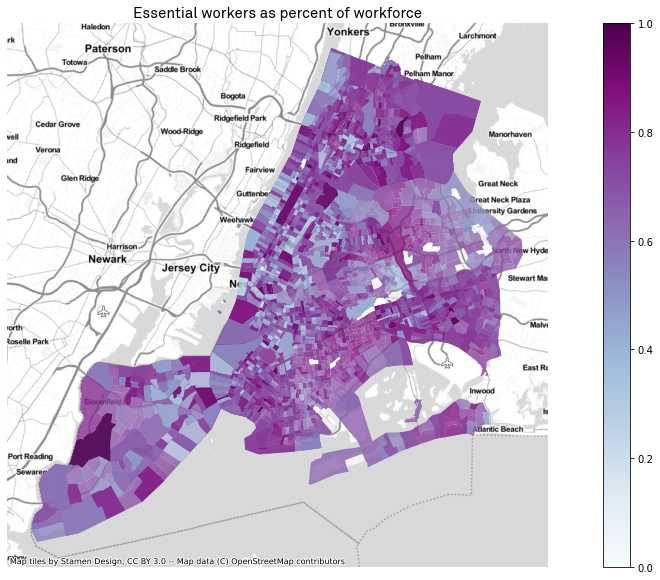

In [23]:
essential_ny = essential_ny.to_crs("EPSG:3857")
fig, ax = plt.subplots(figsize=(20,10))

essential_ny[((essential_ny['COUNTYFP']=='061')|
                   (essential_ny['COUNTYFP']=='005')|
                   (essential_ny['COUNTYFP']=='085')|
                   (essential_ny['COUNTYFP']=='081')|
                  (essential_ny['COUNTYFP']=='047'))].plot(ax=ax, 
                                                                column='pct_essential',
                                                                legend=True,
                                                                cmap="BuPu",alpha=.8)
ctx.add_basemap(ax, crs=essential_ny.crs.to_string(),source=ctx.providers.Stamen.TonerLite)
ax.set_title("Essential workers as percent of workforce", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()

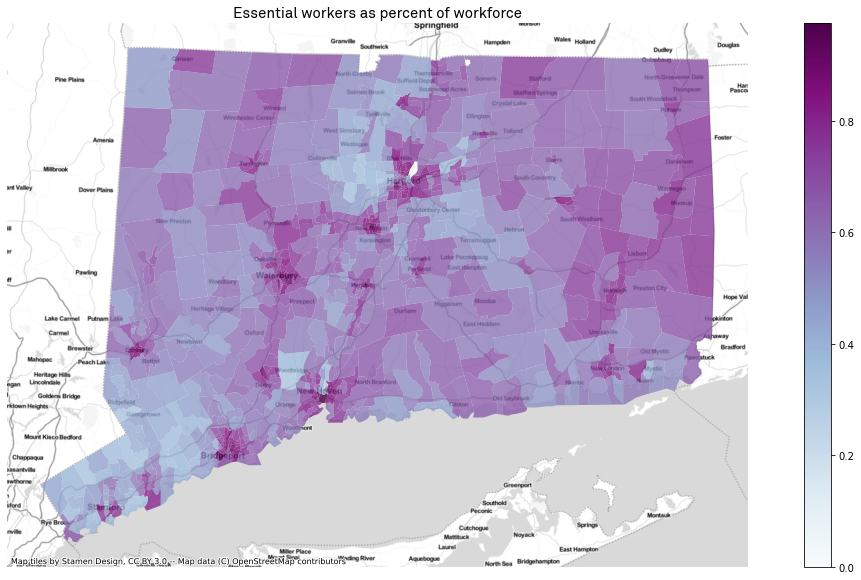

In [19]:
essential_ct = essential_ct.to_crs('EPSG:2234')

fig, ax = plt.subplots(figsize=(20,10))
essential_ct.plot(ax=ax, column='pct_essential',legend=True,cmap="BuPu",alpha=.8)
ctx.add_basemap(ax, crs=essential_ct.crs.to_string(),source=ctx.providers.Stamen.TonerLite)
ax.set_title("Essential workers as percent of workforce", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()

# essential_ct.plot(column='pct_essential',legend=True,cmap='BuPu')

# USA essential work

In [2]:
# ACS download for all 50 states

# getting a list of fips codes
fips_all = us.states.mapping('fips','abbr')
fips_df = pd.DataFrame.from_dict(fips_all,orient='index').reset_index()
state_fips = fips_df['index'].tolist()


In [71]:

# pulling census data for tracts in all states
usa_essential = []
for i,val in enumerate(state_fips):
    temp = c.acs5.get((occ_var),geo={'for':'tract:*','in':'state:{}'.format(val)})
    print('state:{}'.format(val))
#     print(temp)
    usa_essential.append(temp)
for_df = []
for i, item in enumerate(usa_essential):
    for_df.extend(item)

state:01
state:02
state:04
state:05
state:06
state:08
state:09
state:10
state:12
state:13
state:15
state:16
state:17
state:18
state:19
state:20
state:21
state:22
state:23
state:24
state:25
state:26
state:27
state:28
state:29
state:30
state:31
state:32
state:33
state:34
state:35
state:36
state:37
state:38
state:39
state:40
state:41
state:42
state:44
state:45
state:46
state:47
state:48
state:49
state:50
state:51
state:53
state:54
state:55
state:56
state:60
state:66
state:69
state:72
state:78
state:11
state:None


In [72]:
## unwrap and create dataframe
## downloaded data includes blank states 
## where there is no data for this variables
subset_usa = usa_essential[0:50]

# create empty dataframe
empty = pd.DataFrame(columns = occ_var)

# iterate over list of state dictionaries
for i,val in enumerate(subset_usa):
    temp_df = pd.DataFrame(subset_usa[i])
    essential_usa = empty.append(temp_df)


In [73]:
ess_list = ['C24010_016E','C24010_019E',
 'C24010_027E','C24010_030E','C24010_034E','C24010_052E',
 'C24010_055E','C24010_063E','C24010_066E','C24010_070E']
total_lst = ['']
essential_usa['essential'] = essential_usa[ess_list].sum(axis=1)
essential_usa['pct_essential'] = essential_usa['essential']/essential_usa['C24010_001E']


In [75]:
# save to csv to speed up processing later
# essential_usa.to_csv("data_processing/c24010_usa.csv")

## 2. Mapping Essential Work

In [2]:
essential_usa = pd.read_csv("data_processing/c24010_usa.csv")